In [26]:
import os
import random
import time
import glob
import json
import dit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
os.chdir("../")
from helpers.compare_helpers import load_frame
from helpers.group_helpers import load_sudokus
from helpers.helpers import SeabornFig2Grid
print(os.getcwd())
os.chdir('./plot_notebooks')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns;sns.set()

def load_frame2(states=2,d=None):        
    # prep dataframe for calculations
    d = d.replace(np.nan, 0)
    d['lenS'] = d['lenS'].astype(int)

    col_names = []
    if 'I(X;sym)' in d.columns:
        df1 = d[['I(X;sym)','I(Xi;sym)']]
        for col in list(df1):
            for col_number in range(max(df1[col].apply(len))):
                col_names.append(col + "_" + str(col_number + 1))
        df2 = pd.concat([pd.DataFrame(df1['I(X;sym)'].tolist(), index= df1.index),
                        pd.DataFrame(df1['I(Xi;sym)'].tolist(), index= df1.index)], axis = 1)
        df2.columns = col_names
        for col in [col for col in col_names if 'Xi' in col]:
            df2[col] = [sum(a) for a in df2[col].tolist()]
        for c in col_names:
            d[c] = df2[c]
        
    d['H(X0)'] = d[['H(Xi)']].apply(lambda row:row['H(Xi)'][0],axis=1)
    d['H(X1)'] = d[['H(Xi)']].apply(lambda row:row['H(Xi)'][1],axis=1)
    return d, col_names

# get WMS per run
def sumSRVs(row):
    row['H(X0)'] = row['H(Xi)'][0]
    row['H(X1)'] = row['H(Xi)'][1]
    row['H(S)'] = row['srv_data'][0][0]
    row['I(X;S)'] = row['srv_data'][0][1]
    row['I(Xi;S)'] = sum(np.array(row['srv_data'][0][2]))
    return row

# https://stackoverflow.com/a/27179208
def scatter3d(states,x,y,z, cs, colorsMap='jet',hue='syn_info'):
    # rotate the axes and update
    for i,angle in enumerate(np.linspace(0,330,4)):
        cm = plt.get_cmap(colorsMap)
        cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        fig = plt.figure(figsize=(6,6))
        ax = Axes3D(fig)
        im = ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
        scalarMap.set_array(cs)
        ax.set_xlabel(x.name, fontsize=14)
        ax.set_ylabel(y.name, fontsize=14)
        ax.set_zlabel(z.name, fontsize=14)
        cax = fig.add_axes([ax.get_position().x1+0.075,ax.get_position().y0,0.02,ax.get_position().height])
        cbar = fig.colorbar(scalarMap,cax=cax)
        cbar.set_label(hue)

        ax.view_init(30, angle)
        plt.draw()
#         plt.savefig('../../results/syndiscresults/'+'states'+states+'/'+str(x.name)+str(y.name)+str(z.name)\
#             +'_hue_'+hue+'_angle'+str(i)+'.png', bbox_inches='tight')    
        plt.pause(.001)
        plt.show()

# get X with equal input entropy
def eq_ent(d):
    hx0s=np.unique(d['H(X0)'].values)
    hx1s=np.unique(d['H(X1)'].values)
    intersect = np.intersect1d(hx0s,hx1s)
    equals = []
    print(intersect)
    for i,ix in enumerate(intersect):
        cur = d[(d['H(X1)']==intersect[i])&(d['H(X0)']==intersect[i])]
        equals.append(cur)
    equals = pd.concat(equals)
    hvals = np.unique(equals['H(X0)'].values)
    return equals, hvals

C:\Users\enrik\Desktop\Mabomba\Studie\MasterCS\Thesis\code


In [27]:
states = 2
dist_type = 'random'
folder = '../../results/test/'
os.chdir(folder)
name = dist_type +'states'+str(states)
allfiles = glob.glob("*.pkl")
files = [file for file in allfiles if name in file]
if len(files) != 0:
    print(files)
    d = pd.concat([pd.read_pickle(f) for f in files])
os.chdir('../../code/plot_notebooks')
# dexploded = load_frame2(d=d)

# d = d.apply(lambda row: sumSRVs(row), axis=1)
# d['WMS(X;S)'] = d['I(X;S)'] - d['I(Xi;S)']
# d['normWMS'] = d['WMS(X;S)']/d['syn_upper']
# d = d.replace([np.inf, -np.inf], np.nan)
# d = d[d['normWMS'].notna()]
d

['randomstates2.pkl']


,systemID,pX,syn_upper,H(Xi),I(X1;X2),statesS,lenS,tot_runtime,syn_info,srv_data,pXS,steps,lenX
0,0,"[0.04832246087169109, 0.5307781556660334, 0.41...",0.245635,"[0.9818703103355721, 0.9968369548997351]",0.736235,2,1,0.042396,0.027859,"[[1.263884232232038, 1.2424718029896753, [0.98...","[0.0457499186829208, 0.002572542188798516, 0.5...",10,2
1,1,"[0.16384266864442368, 0.15222093966210842, 0.4...",0.870523,"[0.9000492987721298, 0.9239778165038591]",0.029527,2,1,0.019707,0.469863,"[[2.3236614583841457, 1.794500458678232, [0.90...","[0.16384266864438402, 0.0, 0.0, 0.152220939662...",10,2
2,2,"[0.30917066607950283, 0.2668840465528728, 0.26...",0.978478,"[0.983245019022525, 0.9853417011064043]",0.004767,2,1,0.015625,0.673122,"[[2.250163382776257, 1.9638196200184184, [0.98...","[0.09097022432728472, 0.21820044175203582, 0.2...",10,2
3,3,"[0.1336439983441869, 0.5876539682915453, 0.243...",0.548382,"[0.8536762062407901, 0.9561196717582818]",0.305294,2,1,0.015632,0.197333,"[[1.8527319801342719, 1.504501848602624, [0.85...","[0.08621128794057456, 0.047432710403562145, 0....",10,2
4,4,"[0.04950952219218521, 0.08136315882540343, 0.8...",0.406860,"[0.5598266679501087, 0.5760454509896412]",0.152967,2,1,0.015618,0.184260,"[[1.7554795872152429, 0.9829051579714712, [0.5...","[0.04950952219225006, 0.0, 0.0, 0.081363158825...",10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,"[0.4690718015963708, 0.4874021796798284, 0.020...",0.258221,"[0.258231602002862, 0.999711857430053]",0.000011,2,1,0.012171,0.044908,"[[2.2119809339264203, 1.2579327661603799, [0.2...","[0.2147511744685462, 0.25432062712782694, 0.24...",10,2
996,996,"[0.07002193740210541, 0.29689988192875744, 0.2...",0.860536,"[0.9482792282140536, 0.8874662728153394]",0.026931,2,1,0.010111,0.318122,"[[2.2678063342715946, 1.8088149610454574, [0.9...","[0.07002193740209578, 0.0, 0.01418138277411166...",10,2
997,997,"[0.25091304603199793, 0.2935966124328463, 0.36...",0.859791,"[0.994276151986444, 0.9575285115642385]",0.097738,2,1,0.012199,0.419518,"[[2.2053458651163136, 1.8540668998015764, [0.9...","[0.12300519391265936, 0.12790785211927005, 0.0...",10,2
998,998,"[0.21578816879571908, 0.11689748687920883, 0.1...",0.823027,"[0.9176467942750057, 0.9694535240874538]",0.094619,2,1,0.018239,0.447609,"[[2.280161736799138, 1.7924808668095285, [0.91...","[0.21578816879561322, 0.0, 0.0, 0.116897486879...",10,2


## Find interesting relations

In [24]:
d['H(X0)'] = d[['H(Xi)']].apply(lambda row:row['H(Xi)'][0],axis=1)
d['H(X1)'] = d[['H(Xi)']].apply(lambda row:row['H(Xi)'][1],axis=1)
plot = d
plot.keys()

Index(['systemID', 'pX', 'syn_upper', 'H(Xi)', 'I(X1;X2)', 'statesS', 'lenS',
       'tot_runtime', 'syn_info', 'srv_data', 'pXS', 'steps', 'lenX', 'H(X0)',
       'H(X1)'],
      dtype='object')

C:\Users\enrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
C:\Users\enrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


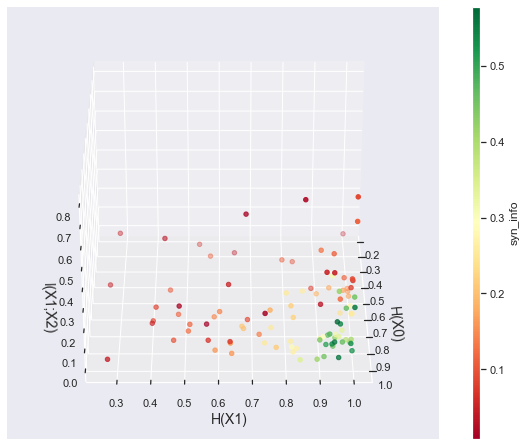

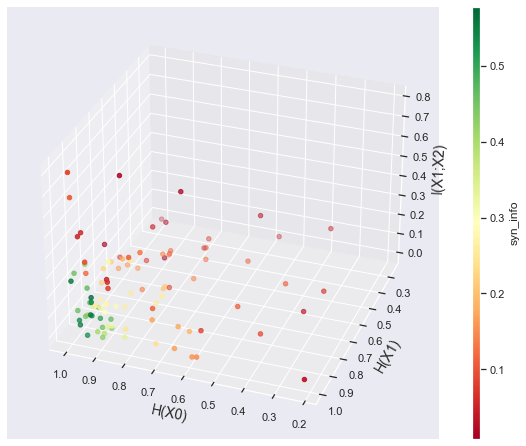

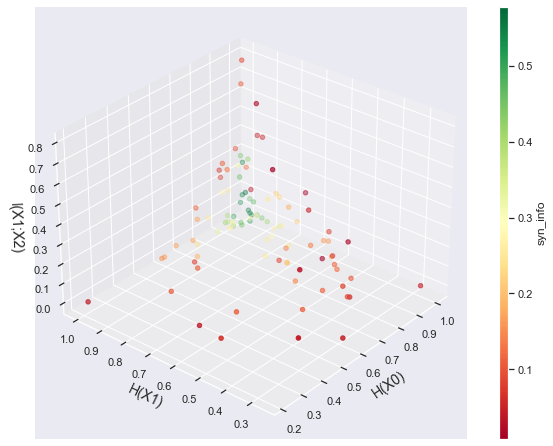

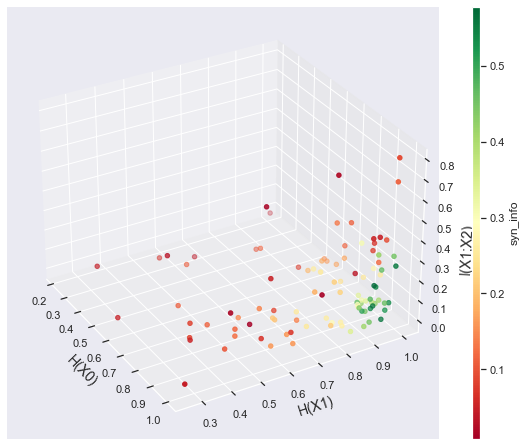

In [25]:
xcol = 'H(X0)'
ycol = 'H(X1)'
zcol = 'I(X1;X2)'

# hue_key='lenX'
hue_key='syn_info'

twoD = False
if twoD:
    fig, ax = plt.subplots(figsize=(10,8))        
    sns.scatterplot(data=plot, x=xcol, y=ycol, 
                    hue=hue_key,size=zcol,
                    sizes=(10,80),s=100,ax=ax)
    title = dist_type+" input dist states="+str(states)
    plt.title(title,fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xcol,fontsize=13)
    plt.ylabel(ycol,fontsize=13)
    plt.show()
else:
    # 3D Plot
    cm = plt.get_cmap("RdYlGn")
    scatter3d(str(states),plot[xcol],plot[ycol],plot[zcol],plot[hue_key],colorsMap=cm,hue=hue_key)
#     scatter3d(plot[xcol],plot[ycol],plot[zcol],plot[hue_key]-plot['I(Xi;sym)_1']
#         ,colorsMap=cm,hue='WMS(XOR)1')

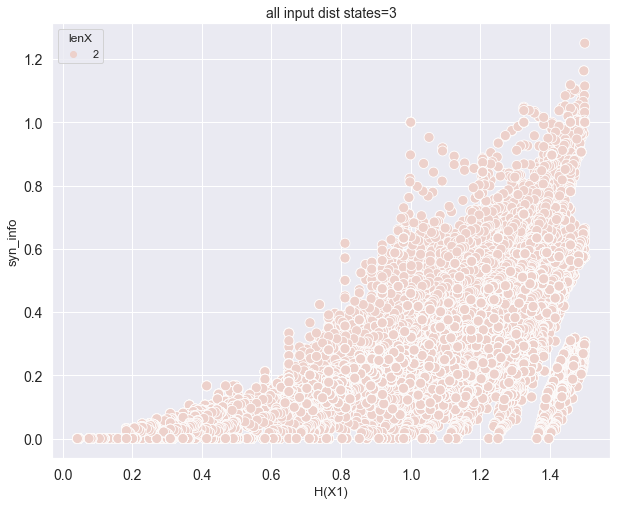

In [26]:
fig, ax = plt.subplots(figsize=(10,8))        
xcol = 'H(X1)'
ycol = 'syn_info'
# hue = 'syn_upper'
hue = 'lenX'
sns.scatterplot(data=plot, x=xcol, y=ycol, 
                hue=hue,
                sizes=(30,120),s=100,ax=ax)
# palette='viridis',
title = dist_type+" input dist states="+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.show()

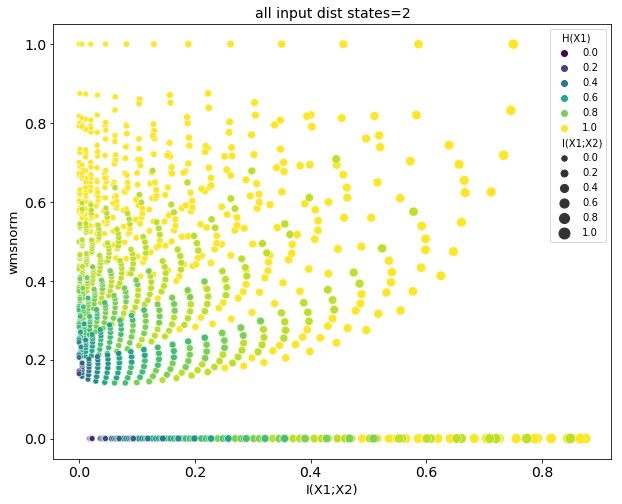

In [7]:
fig, ax = plt.subplots(figsize=(10,8))        
xcol = 'I(X1;X2)'
ycol = 'wmsnorm'

sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue='H(X1)',palette='viridis',size='I(X1;X2)',
                sizes=(30,120),s=100,ax=ax)

title = dist_type+" input dist states="+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.show()

## Find interesting found srvs

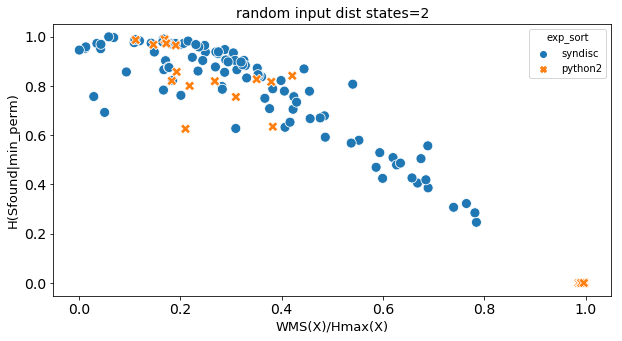

In [5]:
fig, ax = plt.subplots(figsize=(10,5))        
xcol = 'WMS(X)/Hmax(X)'
ycol = 'H(Sfound|min_perm)'

sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue='exp_sort',style='exp_sort',
                sizes=(10,60),palette='tab10',s=100,ax=ax)

title = dist_type+" input dist states="+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.show()